# **3 - Modelo**

Importamos las mismas librerias que antes, por si se tienen que usar de vuelta

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg


In [2]:
train_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\train'
test_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\test'
val_folder = r'C:\Users\bertr\Desktop\UDD\Proyecto final\datos\val'

Como se explico en el EDA, se debe de realizar la generación de imágenes en tiempo real, y por lo tanto no se tienen que guardar localmente, sino que volver a llamarse. 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Tamaño del batch. Mientras más pequeño sea, mejor aprenderá el modelo. 
batch_size = 32

#Se reescalan todas las imágenes para que tengan una resolución mucho más pequeña
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Agarramos las imágenes de sus respectivas carpetas, y las guardamos
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Ahora estoy creando una red convolucional para entrenar mi modelo. En mi capa de entrada, debe de tener un tamaño de 150 por 150, ya que ese es el tamaño al que se reajustaron los pixeles. Otras dimensiones no podrían ser posibles. 

Al final hay una capa de activiación sigmoid, ya que es un tarea binaria. Cambie luego el learning rate a 0.0001 para que el modelo aprenda más. 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

model1.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust the learning rate as needed
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\bertr\anaconda3\envs\bootcmap\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Entrenamiento del modelo
epochs = 10

history1 = model1.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
)


Epoch 1/10


c:\Users\bertr\anaconda3\envs\bootcmap\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 473ms/step - accuracy: 0.7841 - loss: 0.4488 - val_accuracy: 0.6875 - val_loss: 0.4853
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 372ms/step - accuracy: 0.9448 - loss: 0.1463 - val_accuracy: 0.7500 - val_loss: 0.4077
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 374ms/step - accuracy: 0.9580 - loss: 0.1126 - val_accuracy: 0.8750 - val_loss: 0.4177
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 376ms/step - accuracy: 0.9723 - loss: 0.0802 - val_accuracy: 0.6875 - val_loss: 0.6918
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.9752 - loss: 0.0782 - val_accuracy: 0.6875 - val_loss: 0.6976
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 368ms/step - accuracy: 0.9743 - loss: 0.0714 - val_accuracy: 0.9375 - val_loss: 0.1463
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 370ms/step - accuracy: 0.9630 - loss: 0.0888 - val_accuracy: 0.8750 - val_loss: 0.2982
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 367ms/step - accuracy: 0.9793 - loss: 0.0665 - val

En el siguiente código, grafico la evolución de la pérdida y la precisión a lo largo de las diez épocas en las cuales corrí mi código. Uso la librería de matplotlib para realizar estos gráficos. 

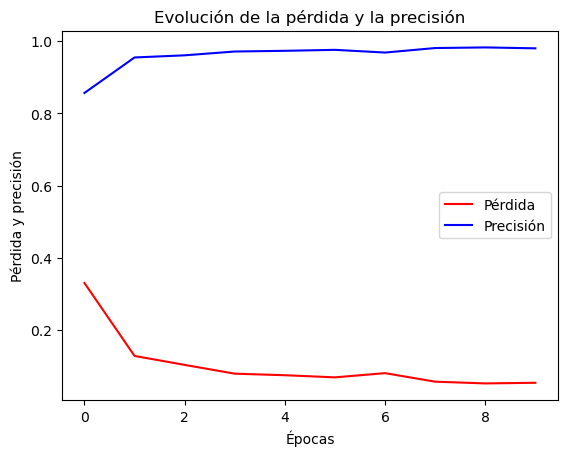

In [7]:
plt.plot(history1.history["loss"], color='red', label='Pérdida')
plt.plot(history1.history["accuracy"], color='blue', label='Precisión')
plt.title("Evolución de la pérdida y la precisión", color='black')
plt.xlabel("Épocas", color='black')
plt.ylabel("Pérdida y precisión", color='black')
plt.legend()
plt.show()

En el gráfico de arriba podemos ver como va evolucionando la pérdida y la precisión del modelo. Se puede ver que en las primeras épocas, hay una precisión bastante alta, la sube un poco en la primera época, y a partir de la segunda se queda estancada en los 90 medios. Esto es una muy buena precisión, sin embargo, hay que tener en cuenta que puede ser una señal de sobre ajuste. Esto se verá en las siguientes pruebas.

Por otro lafo, la pérdida disminuye bastante a medida que van pasando las épocas. Este valor se va disminutendo constantemente, hasta valores muy cercanos a cero, lo cual podría ser un muy buen indicio. Sin embargo, hay que tener en cuenta que esto podría ser un sobreajuste, lo cual se verá más adelante. 

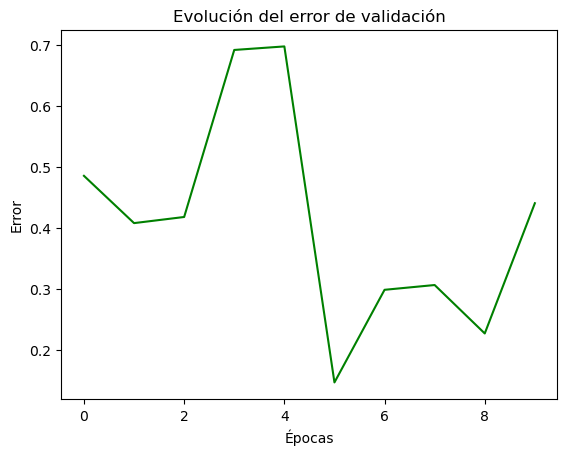

In [8]:
plt.plot(history1.history["val_loss"], color='green')
plt.title("Evolución del error de validación", color='black')
plt.xlabel("Épocas", color='black')
plt.ylabel("Error", color='black')
plt.show()

Aquí podemos ver el error de validación a medida que transcurren las distintas épocas. Va alternando, y eventualmente baja a un nivel relativamente bajo.

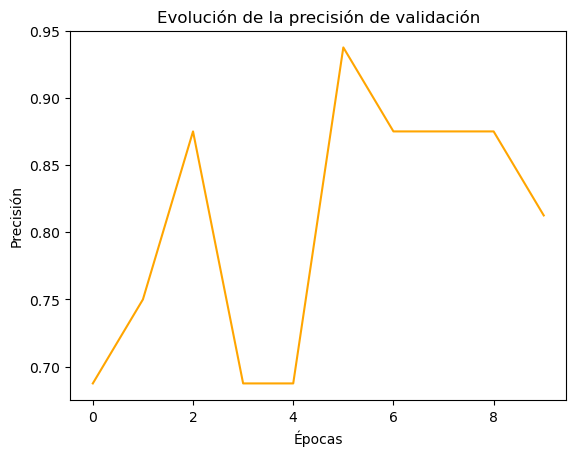

In [9]:
plt.plot(history1.history["val_accuracy"], color='orange')
plt.title("Evolución de la precisión de validación", color='black')
plt.xlabel("Épocas", color='black')
plt.ylabel("Precisión", color='black')
plt.show()


Aquí podemos ver la evolución de la precisión de la validación. Esta calcula la precisión con los datos de validación que están siendo pasadas por el modelo. Podemos ver que va subiendo y bajando, hasta que llega a un valor estable de 85.

## **Predicciones**

Ahora realizaré predicciones con las datos de prueba. Realizaré un total de diez predicciones.

In [10]:
# Predicciones con los datos de prueba
num_predictions = 10
test_images, test_labels = next(test_generator)

Usamos el modelo entrenado anteriormente para estas nuevas imágenes.

In [11]:
#Predicciones
predictions = model1.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Redondeamos las predicciones que se obtuvieron para ver los resultados. 

In [12]:
binary_predictions = np.round(predictions)

Guardamos las etiquetas correctas en una nueva variable. 

In [13]:
y_true = test_labels

Importamos las librerías necesarias, y calculamos el accuracy y la precisión. 

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_true, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.71875


Esta es la accuracy obtenido con las nuevas predicciones. Podemos ver que es mucho más baja que lo que se estaba obteniendo en el entrenamiento del modelo, por lo tanto, hay un poco de sobreajuste ocurriendo. 

In [15]:
# Calcular la precisión
precision = precision_score(y_true, binary_predictions)
print("Precision:", precision)

Precision: 0.6785714285714286


Se puede ver una precisión bastante pequeña, de solo el 67% aproximadamente. Esto muestra que hay bastante variabilidad en los resultados, y no están muy cerca uno de los otros. 

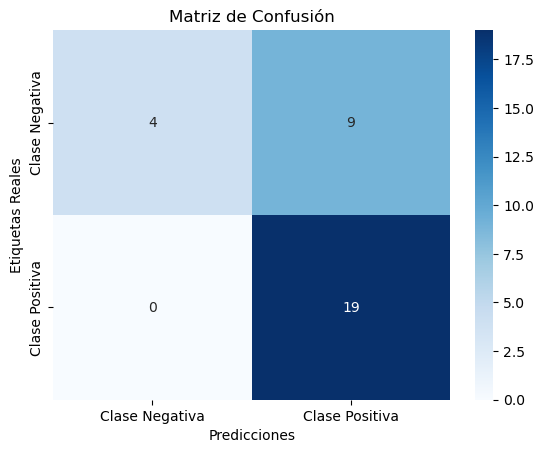

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, binary_predictions)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

#

Esta matriz de confusión muestra visualmente los resultados de mi modelo. Por la cantidad de datos que hay, la clase positiva pertenece a aquellos datos que muestran un pulmón sano, mientras que la clase negativa muestra los pulmones no sanos. Hay un total de 19 verdaderos positivos, 9 falsos positivos (pulmones no sanos clasificados como sanos) y 4 verdaderos negativos (tiene neumonía, y se predijo neumonía). No hay falsos negativos. Tengamos en cuenta que en este caso, debido a la sensabilidad de los datos con lo que se están trabajando, es mucho peor tener más falsos negativos que falsos positivos. Sería mucho mejor que se crea que un paciente no tiene neumonía en vez de creer que si la tiene. 

Esta es solo una iteración de este modelo. Veamos otros modelos, y su rendimiento, teniendo en cuenta la métrica que se acaba de mencionar. 

In [20]:
import pickle

# Save the model
with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)


Guardo el modelo en un archivo pickle para poder usarlo más tarde en el ensamblaje. 

# **Modelo 2**

Ahora voy a entrenar otro modelo, parecido al anterior, pero le voy a agregar dropout, para ver si influye en el rendimiento de alguna manera. Los pasos son muy parecidas al anterior, asi que no hace falta comentar. 

In [21]:
from tensorflow.keras.layers import Dropout

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\bertr\anaconda3\envs\bootcmap\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Entrenamiento del modelo
epochs = 10

history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 389ms/step - accuracy: 0.7813 - loss: 0.4712 - val_accuracy: 0.6250 - val_loss: 0.8564
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.9195 - loss: 0.2092 - val_accuracy: 0.6250 - val_loss: 0.7910
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.9443 - loss: 0.1567 - val_accuracy: 0.6875 - val_loss: 0.7234
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.9512 - loss: 0.1325 - val_accuracy: 0.6875 - val_loss: 0.6960
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 374ms/step - accuracy: 0.9626 - loss: 0.1140 - val_accuracy: 0.8750 - val_loss: 0.3537
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 380ms/step - accuracy: 0.9550 - loss: 0.1200 - val_accuracy: 0.8125 - val_loss: 0.5764
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.9662 - loss: 0.1003 - val_accuracy: 0.8750 - val_loss: 0.3870
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 373ms/step - accuracy: 0.9662 - loss: 0

In [23]:
model2.save_weights('model2.weights.h5')

Guardo el modelo en un archivo pickle. 

## **Predicciones**

Ahora realizaré predicciones con las datos de prueba. Realizaré un total de diez predicciones.

In [24]:
# Predicciones con los datos de prueba
num_predictions = 10
test_images, test_labels = next(test_generator)

Usamos el modelo entrenado anteriormente para estas nuevas imágenes.

In [25]:
#Predicciones
predictions = model2.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Redondeamos las predicciones que se obtuvieron para ver los resultados. 

In [26]:
binary_predictions = np.round(predictions)

Guardamos las etiquetas correctas en una nueva variable. 

In [27]:
y_true = test_labels

Importamos las librerías necesarias, y calculamos el accuracy y la precisión. 

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_true, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.75


Aqui podemos ver el accuracy de este segundo modelo. Es un poco más alto que el anterior, por lo tanto no hay tanto sobreajuste. 

In [29]:
# Calcular la precisión
precision = precision_score(y_true, binary_predictions)
print("Precision:", precision)

Precision: 0.7241379310344828


Se puede decir lo mismo acerca de la precisión. 

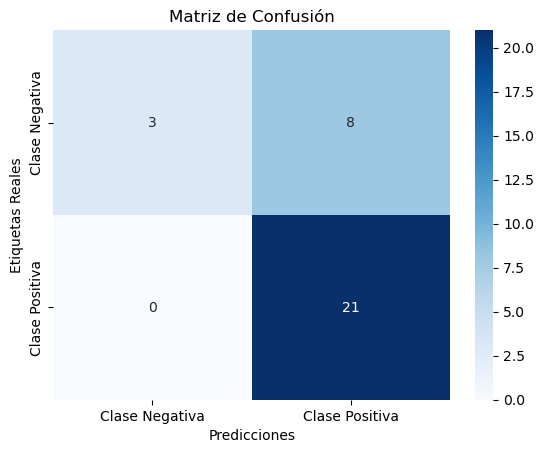

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, binary_predictions)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

Aquí podemos ver los resultados del modelo. Hay una mayor cantidad de verdaderos positivos. Al igual que antes, los falsos positivos son los más graves, debido a que pueden llegar a tener más impacto negativo. Hay más de estos en este ejemplo, lo cual muestra unos resultados que podrían llegar a ser peligrosos en producción. 

In [34]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)


Guardamos el modelo en un archivo pickle para el ensamble más tarde. 

# **Modelo 3**


Ahora entenaré un último modelo. La diferencia de este es que tendrá más capas. Abajo veremos el impacto de esto. 

In [35]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\bertr\anaconda3\envs\bootcmap\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Entrenamiento del modelo
epochs = 10

history2 = model2.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 376ms/step - accuracy: 0.9687 - loss: 0.0977 - val_accuracy: 0.8750 - val_loss: 0.3883
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 374ms/step - accuracy: 0.9796 - loss: 0.0721 - val_accuracy: 0.8125 - val_loss: 0.6076
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 371ms/step - accuracy: 0.9720 - loss: 0.0834 - val_accuracy: 0.8750 - val_loss: 0.4649
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 370ms/step - accuracy: 0.9776 - loss: 0.0701 - val_accuracy: 0.8750 - val_loss: 0.5408
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.9755 - loss: 0.0733 - val_accuracy: 0.8750 - val_loss: 0.4668
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 368ms/step - accuracy: 0.9759 - loss: 0.0622 - val_accuracy: 0.7500 - val_loss: 0.6362
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 365ms/step - accuracy: 0.9801 - loss: 0.0565 - val_accuracy: 0.8125 - val_loss: 0.6003
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.9819 - loss: 0

Se guarda el modelo en un archivo pickle después de entrenarlo. 

In [48]:
# Save the model
with open('model3.pkl', 'wb') as f:
    pickle.dump(model3, f)


## **Predicciones**

Ahora realizaré predicciones con las datos de prueba. Realizaré un total de diez predicciones.

In [38]:
# Predicciones con los datos de prueba
num_predictions = 10
test_images, test_labels = next(test_generator)

Usamos el modelo entrenado anteriormente para estas nuevas imágenes.

In [39]:
#Predicciones
predictions = model3.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Redondeamos las predicciones que se obtuvieron para ver los resultados. 

In [40]:
binary_predictions = np.round(predictions)

Guardamos las etiquetas correctas en una nueva variable. 

In [41]:
y_true = test_labels

Importamos las librerías necesarias, y calculamos el accuracy y la precisión. 

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcular la precisión
accuracy = accuracy_score(y_true, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.375


Se obtiene un accuracy bastante baja a pesar de que en el entrenamiento fue muy alta. Esto muestra que hay un sobreajuste en el modelo. 

In [43]:
# Calcular la precisión
precision = precision_score(y_true, binary_predictions)
print("Precision:", precision)

Precision: 1.0


La precisión es altísima, mostrando que los datos están muy cerca uno de los otros. 

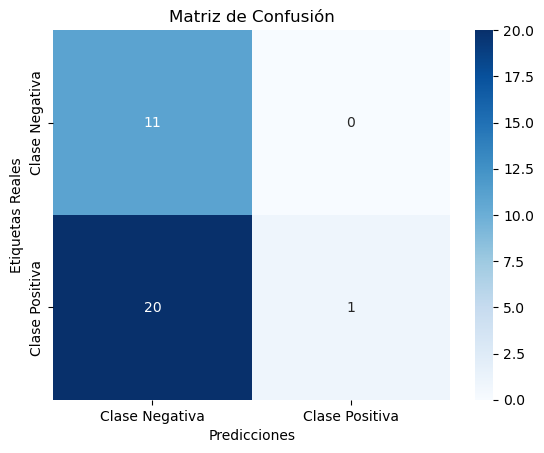

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas para los ejes
labels = ['Clase Negativa', 'Clase Positiva']

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, binary_predictions)

# Crear el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuraciones adicionales para mejorar la visualización
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

En esta matriz de confusión podemos ver los resultados de este último modelo. Curiosamente, tiene muy pocos verdaderos positivos, y muchos falsos negativos y verdaderos negativos. Es decir, estima que mucho más de lo que se cree de que alguien tiene neumonía cuando en realidad no la tiene. Cómo se explicó anteriormente, es mejor tener predicciones negativas. Sin embargo, en este caso son demasiadas.

## **Conclusiones del entrenamiento**
Ya se realizaron los entrenamiento de los diversos modelos que se me ocurrieron. Ya los guardé en un archivo pickle. En el siguiente notebook, pasaré al ensamblaje de estos modelos, y veré cuál es el mejor de estos datos lo que se ha ido comentando. 